In [1]:
import numpy as np
import networkx as nx
from networkx.algorithms import traversal
from scipy.signal import convolve2d

In [2]:
with open('input20.txt') as f:
    input = [block.splitlines() for block in f.read().split('\n\n')][:-1]

In [3]:
tiles = {int(block[0][5:9]): np.array([[p for p in l] for l in block[1:]]) for block in input}
len(tiles)

144

In [4]:
def normal_borders(tile):
    return {''.join(edge) for edge in (tile[0,:], tile[:,0], tile[-1,:], tile[:,-1])}

def reversed_borders(tile):
    return {e[::-1] for e in normal_borders(tile)}

def borders(tile):
    return normal_borders(tile) | reversed_borders(tile)

t = tiles[1213]
borders(t)

{'####.#.###',
 '###.#.####',
 '##...####.',
 '##...#....',
 '.####...##',
 '.#.##..#..',
 '..#..##.#.',
 '....#...##'}

In [5]:
G = nx.Graph()

for id1, tile1 in tiles.items():
    for id2, tile2 in tiles.items():
        if id1 != id2 and borders(tile1) & borders(tile2) != set():
            G.add_edge(id1, id2)

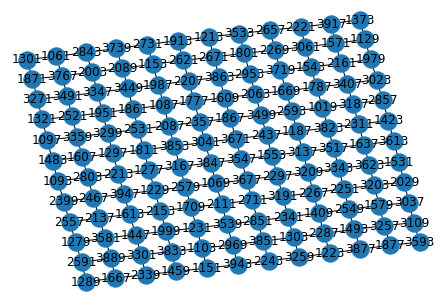

In [6]:
nx.draw_kamada_kawai(G, with_labels=True)

In [7]:
for n in G.nodes():
    if G.degree[n] == 2:
        print(n)

1301
1289
3593
1373


In [8]:
successors = dict(traversal.bfs_successors(G, 1301))

In [9]:
image = np.zeros_like(t)[np.newaxis, np.newaxis, :, :]
image = np.repeat(image, 12, axis=0)
image = np.repeat(image, 12, axis=1)
image[:, :, 1:-1, 1:-1].shape

(12, 12, 8, 8)

In [10]:
def put(id, tile, x, y):
    image[x, y] = tile
    right_border = tile[:, -1]
    bottom_border = tile[-1, :]

    for succ_id in successors.get(id, []):
        succ_tile = tiles[succ_id]
        fit = False
        if ''.join(bottom_border) in borders(succ_tile):
            while not fit:
                succ_tile = np.rot90(succ_tile)
                if np.array_equal(bottom_border, succ_tile[0, :]):
                    fit = True
                elif np.array_equal(bottom_border, succ_tile[0, :][::-1]):
                    succ_tile = np.fliplr(succ_tile)
                    fit = True
            put(succ_id, succ_tile, x+1, y)
        elif ''.join(right_border) in borders(succ_tile):
            while not fit:
                succ_tile = np.rot90(succ_tile)
                if np.array_equal(right_border, succ_tile[:, 0]):
                    fit = True
                elif np.array_equal(right_border, succ_tile[:, 0][::-1]):
                    succ_tile = np.flipud(succ_tile)
                    fit = True
            put(succ_id, succ_tile, x, y+1)
        else:
            print("waaah")

t1 = np.rot90(tiles[1301], 3)
put(1301, t1, 0, 0)


In [11]:
image = image[:, :, 1:-1, 1:-1]
image = np.block([[row] for row in image])
image = np.block([col for col in image])
image = np.where(image == '#', 1, 0)


In [12]:
monster = ['                  # ',
           '#    ##    ##    ###',
           ' #  #  #  #  #  #   ']
monster = np.array([[c for c in line] for line in monster])
monster = np.where(monster == '#', 1, 0)

In [13]:
np.sum(monster)

15

In [14]:
image = np.fliplr(image)
np.sum(convolve2d(np.rot90(image, 3), monster) == m)

19

In [15]:
np.sum(image) - 19*15

2304